# N13 Анализ данных. Pandas

Автор: Шабанов Павел Александрович

Email: pa.shabanov@gmail.com

URL: [Заметки по программированию в науках о Земле](http://progeoru.blogspot.ru/)

Дата последнего обновления: 23.03.2017

### План

1. Модуль pandas

2. pandas DataFrame
    + подписи осей таблицы DataFrame;
    + индексация DataFrame.
    
3. Чтение данных с помощью pandas DataFrame
    + pd.read_csv();
    + pd.read_wfw()
    + pd.read_excel()

4. Запись данных с помощью pandas DataFrame
    + Запись данных в текстовые файлы;
    + Запись данных в файлы MS Excel;
### Цель: 

+ получить базовые знания и навыки для работы с модулем анализа данных pandas.

### Ссылки:

+ [Официальный сайт проекта Pandas](http://pandas.pydata.org/)

+ [Tutorials from pandas.pydata](http://pandas.pydata.org/pandas-docs/stable/tutorials.html);

## Модуль Pandas

[Источник](https://ru.wikipedia.org/wiki/Pandas)

**Pandas** — библиотека на языке Python для обработки и анализа данных. 

Работа pandas с данными строится поверх библиотеки NumPy, являющейся инструментом более низкого уровня. Pandas предоставляет специальные структуры данных и операции для манипулирования числовыми таблицами и временными рядами. Название библиотеки происходит от эконометрического термина «панельные данные», используемого для описания многомерных структурированных наборов информации. Pandas распространяется под новой лицензией BSD.

Несмотря на то, что Python в течение долгого времени успешно применяется для подготовки данных, его использование для анализа и моделирования оставалось затруднённым. Часто требуется выполнять часть задач при помощи инструментов, отражающих специфику предметной области, таких как язык R. **Pandas** восполняет описанный недостаток, позволяя полностью проводить все этапы анализа информации на Python.

Сейчас в pandas реализована лишь малая часть возможностей моделирования, однако работа в данном направлении находится в приоритете. На данный момент разработчики рекомендуют обратить внимание на такие пакеты как **statsmodels** и **scikit-learn** (Машинное обучение на python).

Де-факто стандарт импортирования pandas выглядит так:

> import pandas as pd

**df** очень часто используется в качестве имени переменной, хранящей ссылку на оюбъект pandas DataFrame.

## DataFrame

Центральным объектом библиотеки (модуля) pandas является объект **DataFrame**. Дословный перевод даёт "блок данных", но мне нравится термин **pandas-Таблица**.

По сути DataFrame - это двумерный псевдомассив, где все строки и столбцы могут иметь нечисловую нумерацию. Т.е. вместо принципа индексирования массивов из модуля numpy по двум осям (*arr[i, j]*) pandas-Таблица предлагает дополнительный функционал в виде обращения к строкам/столбцам/элементам по ключам (как в словарях).

In [11]:
import numpy as np
import pandas as pd

shape1 = (20, 14)
arr = np.random.random(shape1)

# Создание dataFrame на основе существующего массива
df = pd.DataFrame(arr)   # преобразование массива arr к dataFrame

print df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
0     20 non-null float64
1     20 non-null float64
2     20 non-null float64
3     20 non-null float64
4     20 non-null float64
5     20 non-null float64
6     20 non-null float64
7     20 non-null float64
8     20 non-null float64
9     20 non-null float64
10    20 non-null float64
11    20 non-null float64
12    20 non-null float64
13    20 non-null float64
dtypes: float64(14)
memory usage: 2.3 KB
None


### Подписи осей таблицы DataFrame

**DataFrame** - это всегда ДВУМЕРНЫЙ псевдомассив. Почему псевдо? Потому что массив содержит только данные одного типа, а DataFrame может содержать данные разных типов по строкам/столбцам.

У объекта DataFrame (df) есть атрибуты, хранящие инфорамцию об именовании строк и столбцов:

+ **df.index** - это последовательность уникальных значений для строк;

+ **df.columns** -  это последовательность уникальных значений для столбцов.

Именовать или переименовать подписи строк/столбцов (row labels/column labels) можно либо при создании DataFrame, либо после, используя методы.

In [25]:
import numpy as np
import pandas as pd

shape1 = (5, 3)
arr = np.random.random(shape1)
xlabels = ['a', 'b', 'c', 'd', 'e']   # "строковые" подписи строк DataFrame

df = pd.DataFrame(arr, 
                  index=xlabels, columns=range(10, 40, 10))   # x числовые подписи столбцов DataFrame

print df
print '*'*35
print df.index
print df.columns

         10        20        30
a  0.193243  0.449483  0.527647
b  0.598115  0.485275  0.436184
c  0.910407  0.004737  0.277489
d  0.065928  0.212776  0.950568
e  0.033037  0.480585  0.280643
***********************************
Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')
Int64Index([10, 20, 30], dtype='int64')


**Заменить** подписи строк/стобцов DataFrame можно простым присваиванием атрибутам index и columns.

In [26]:
print 'Before'
print df.index
print df.columns

df.index = range(-5, 0, 1)
df.columns = ['A', 'B', 'C']

print 'After'
print df.index
print df.columns
print df

Before
Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')
Int64Index([10, 20, 30], dtype='int64')
After
Int64Index([-5, -4, -3, -2, -1], dtype='int64')
Index([u'A', u'B', u'C'], dtype='object')
           A         B         C
-5  0.193243  0.449483  0.527647
-4  0.598115  0.485275  0.436184
-3  0.910407  0.004737  0.277489
-2  0.065928  0.212776  0.950568
-1  0.033037  0.480585  0.280643


### Индексация DataFrame

Обращаться к элементам и осям pandas-таблицы можно по-разному. Существует аж 3 способа это сделать:

1. Через индексы как в numpy-массивах. Синтаксис здесь отличается - необходимо использовать метод **iloc**

2. Через подписи как в словарях. Для каждой оси - свой ключ. Для вызова этого метода необходимо использовать **loc**

3. И через индексы и через подписи (смешанный тип). Обращение к одной из осей идёт по ключу, а к другой - через индекс. Для вызова этого метода необходимо использовать **ix**

In [27]:
# Типы индексаций в pandas

import numpy as np
import pandas as pd

shape1 = (5, 3)
arr = np.random.random(shape1)*150.
xlabels = ['a', 'b', 'c', 'd', 'e']   # "строковые" подписи строк DataFrame
ylabels = ['I', 'II', 'III']
df = pd.DataFrame(arr, index=xlabels, columns=ylabels)   # x числовые подписи столбцов DataFrame

print '\n{:=^30}\n'.format('iloc')

# iloc - Через индексацию
print df.iloc[1, :]
print df.iloc[2, 2]

print '\n{:=^30}\n'.format('loc')

# loc - Через подписи
cols = df.columns[:]
print df.loc[:, cols[1]]
print df.loc['d', 'II']

print '\n{:=^30}\n'.format('ix')

# ix - смешанный тип
cols = df.columns[:]
inx = df.index[:]
print df.ix[:, 1]
print df.ix['a', 2]
print df.ix[3, 'I']


=============iloc=============

I      38.516166
II     56.773774
III    48.646303
Name: b, dtype: float64
140.215212856

=============loc==============

a    62.339347
b    56.773774
c    70.821103
d    62.456930
e    16.031861
Name: II, dtype: float64
62.4569303208

==============ix==============

a    62.339347
b    56.773774
c    70.821103
d    62.456930
e    16.031861
Name: II, dtype: float64
112.307090541
88.2702966966


Несмотря на наличие подписей, таблица в любом случае продолжает поддерживать двумерную индексацию элементов. Просто она скрыта от пользователя. Индексация начинается от 0. Поддерживается обратная индексация через отрицательные индексы.

Векторные срезы поддерживаются, они должны быть однотипными. Смешивать индексы и ключи при "векторном срезании" не разрешается.

In [15]:
# Один результат разными методами

print df.iloc[-4:-1, :]
print df.ix[1:-1, :]
print df.loc[['b', 'c','d'], :]

# Векторные срезы
print '\n{:=^30}\n'.format('Векоторные срезы')
vecs1 = [0, 2, 4]
print df.iloc[vecs1, :]

vecs2 = ['a', 'b', 'e']
vecs3 = ['I', 'III']
print df.loc[vecs2, vecs3]

vecs4 = [-1, -3, -2]
vecs5 = ['I', 'III']
print df.ix[vecs4, vecs5]

            I          II        III
b  147.118574   49.070428  56.800492
c  114.554625   88.076476  55.433144
d    8.456217  114.226673  76.609781
            I          II        III
b  147.118574   49.070428  56.800492
c  114.554625   88.076476  55.433144
d    8.456217  114.226673  76.609781
            I          II        III
b  147.118574   49.070428  56.800492
c  114.554625   88.076476  55.433144
d    8.456217  114.226673  76.609781

Векоторные срезы

            I         II        III
a   15.619269   6.499394  53.007220
c  114.554625  88.076476  55.433144
e   52.458614  75.153235  68.268671
            I        III
a   15.619269  53.007220
b  147.118574  56.800492
e   52.458614  68.268671
            I        III
e   52.458614  68.268671
c  114.554625  55.433144
d    8.456217  76.609781


Помимо вышеперечисленных способов, DataFrame поддерживает ещё и удобное обращение к столбцам. Это можно сделать через подпись столбца в квадратных скобках. Автоматически будут выбраны все строки из текущего DataFrame.

Такой метод возвращает ещё один ключевой объект модуля pandas - **Series** или ряд (близко к Time Series). Это одномерная последоветльность, индексированная подписями строк и поддерживающая обычную числовую индексацию.

In [16]:
import pandas as pd

dic = {'I':2, "II":7, 'III':12, "IV":17, 'V':17}
df = pd.DataFrame(dic.items(), columns=['E95', 'M10'])

print df
print '\n{:=^30}\n'.format('pandas Series')

ts = df['M10']
print ts
print type(ts)

   E95  M10
0    I    2
1   II    7
2    V   17
3  III   12
4   IV   17

========pandas Series=========

0     2
1     7
2    17
3    12
4    17
Name: M10, dtype: int64
<class 'pandas.core.series.Series'>


## Чтение данных с помощью pandas DataFrame

### pd.read_csv()

Pandas предоставляет наиболее широкие возможности для чтения текстовых файлов с числовой информацией.

Вместо **numpy.genfromtxt()** здесь используется **pandas.read_csv()**. Объект, который возвращает эта функция, - либо DataFrame, либо одномерный вариант Series.

   YYYY-MM-DD  hh:mm   Original   Calculated   Flag
0  1931-01-01  --:--     6570.0       6570.0   -999
1  1931-01-02  --:--     6480.0       6480.0   -999
2  1931-01-03  --:--     6320.0       6320.0   -999
3  1931-01-04  --:--     5930.0       5930.0   -999
4  1931-01-05  --:--     5750.0       5750.0   -999
5  1931-01-06  --:--     5680.0       5680.0   -999
6  1931-01-07  --:--     5530.0       5530.0   -999
7  1931-01-08  --:--     5500.0       5500.0   -999
8  1931-01-09  --:--     5530.0       5530.0   -999
9  1931-01-10  --:--     5510.0       5510.0   -999
Columns: Index([u'YYYY-MM-DD', u'hh:mm', u' Original', u' Calculated', u' Flag'], dtype='object')


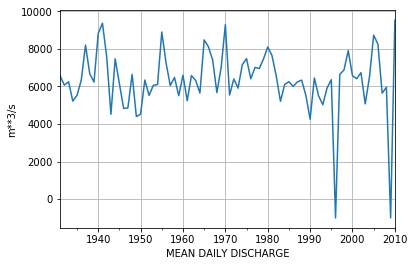

In [17]:
%matplotlib inline

import os
import pandas as pd

cwd = os.getcwd()

fileName = '6742900.day'   # Данные по Дунаю
iPath = './dataset/dat6/{}'.format(fileName)

df = pd.read_csv(iPath, skiprows=40, sep=';')
print df.head(10)

print 'Columns:', df.columns

ts = df[' Original'][:]
f = [pd.to_datetime(v) for v in df['YYYY-MM-DD']]
ts.index = f[:]
adf = ts.resample('A').mean()
ax = adf.plot(grid=True)
ax.set_xlabel('MEAN DAILY DISCHARGE')
ax.set_ylabel('m**3/s')

### pd.read_wfw()

Для некоторых текстовых файлов, которые были созданы с т.н. фиксированной длиной записи, обычный метод сепарации данных через пробелы, табуляции или другие разделители (например, точку с запятой) может не сработать. 

Если данные "слипаются", когда между ними нет свободного места, то pandas предлагает другой метод - **pd.read_fwf()**.

In [18]:
import pandas as pd

widths = [4, 2, 2, 10, 10, 10, 10, 10]   #
fileName = '14101500.dly'   # Данные MOPEX
iPath = './dataset/dat6/{}'.format(fileName)
wf = pd.read_fwf(iPath, widths=widths, header=None)
print wf.head(10)

      0  1   2      3    4        5       6       7
0  1948  1   1  11.64  0.0   0.8330  6.6056 -1.3722
1  1948  1   2   5.53  0.0   1.1864  6.5333  0.5944
2  1948  1   3   6.64  0.0   1.1864  5.1667 -1.5500
3  1948  1   4   6.45  0.0   1.1497  4.5556 -0.7556
4  1948  1   5  32.45  0.0   1.0487  2.8778 -3.0389
5  1948  1   6  44.98  0.0   2.1686  4.0556 -0.5333
6  1948  1   7   8.73  0.0  10.4184  7.4667  0.8056
7  1948  1   8   1.90  0.0   6.8844  6.1389 -0.9056
8  1948  1   9   4.46  0.0   4.5207  2.7778 -4.6222
9  1948  1  10   5.14  0.0   3.5110  3.2278 -3.9778


### pd.read_excel()

Таблицы MS Excel - это один из самых органичных форматов для агреграции их с помощью pandas DataFrame. Чтение файлов форматов xls/xlsx становится с pandas настоящим удовольствием - **pd.read_excel()**.



In [19]:
import pandas as pd

fileName = 'book_tgt_climate_2.xlsx'
filePath = './dataset/dat6'
iPath = '{}/{}'.format(filePath, fileName)

# Определяем подписи для стобцов DataFrame
cols = pd.read_excel(iPath, skiprows=2, usecols=[0, 1, 2, 3, 4], skip_footer=999)

ex = pd.read_excel(iPath, skiprows=4, parse_cols='A:E', skip_footer=8,
                   names=cols.columns)

print ex.head(7)

   Year   Coal   Oil  Natural Gas  Total
0  1900  515.0  16.0          3.0  534.0
1  1901  531.0  18.0          4.0  553.0
2  1902  543.0  19.0          4.0  566.0
3  1903  593.0  20.0          4.0  617.0
4  1904  597.0  23.0          4.0  624.0
5  1905  636.0  23.0          5.0  664.0
6  1906  680.0  23.0          5.0  708.0


In [20]:
cols = pd.read_excel(iPath, skiprows=2, usecols=[0, 1, 2, 3, 4], skip_footer=999)
print cols.columns.values

[u'Year' u'Coal' u'Oil' u'Natural Gas' u'Total']


## Запись данных с помощью pandas DataFrame

С pandas удобно не только считывать данные, но и записывать их в файлы! Функция сохранения здесь реализованан в виде методов DataFrame **to_csv** и **to_excel**.

### df.to_csv()

Запись в текстовый файл похожа на чтение данных: нужны имя выходоного файла и путь к нему, указать тип разделителя, определиться с header и index (подписями столбцов/строк). Обратите внимание на параметр **float_format**, который определяет представление чисел с плавающей запятой в файле (часто - число знаков после запятой).

Если таблица имела подписи (не индексы), то по умолчанию они будут также записаны в выходной файл.

         0         1         2         3         4         5         6   \
0  0.406673  0.849191  0.969383  0.529111  0.996786  0.546646  0.174491   
1  0.334295  0.226263  0.646008  0.592361  0.828576  0.937463  0.409783   
2  0.274827  0.964028  0.743230  0.706992  0.560090  0.765529  0.337996   
3  0.401926  0.532954  0.168215  0.481798  0.099418  0.950383  0.850380   
4  0.262429  0.509651  0.114383  0.437847  0.855988  0.803929  0.801882   

         7         8         9         10        11        12        13  
0  0.160059  0.881592  0.062729  0.652720  0.057432  0.897954  0.556557  
1  0.163789  0.859759  0.637650  0.328381  0.949236  0.503253  0.076027  
2  0.999088  0.861208  0.989328  0.944619  0.059847  0.337351  0.189525  
3  0.888814  0.985114  0.722403  0.848807  0.522381  0.654874  0.372816  
4  0.836896  0.821271  0.033005  0.265382  0.154231  0.223672  0.980796  


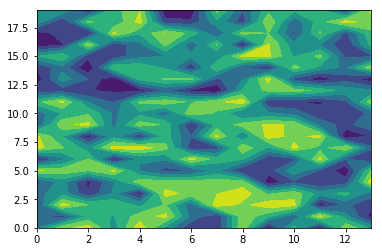

1965    0.450852
1966    0.788986
1967    0.905450
1968    0.219924
1969    0.014259
Name: Ray, dtype: float64


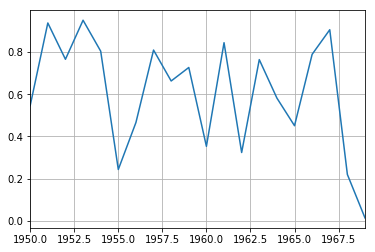

In [21]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

now = datetime.datetime.now()

fileName = 'df_random2arr_{}.txt'.format(now.strftime("%Y-%m-%d"))
filePath = './dataset/dat6'
iPath = '{}/{}'.format(filePath, fileName)

shape1 = (20, 14)
arr = np.random.random(shape1)

# Создание dataFrame на основе существующего массива
df = pd.DataFrame(arr)   # преобразование массива arr к dataFrame
print df.head(5) 
df.to_csv(iPath, sep=';', float_format='%.3f')

plt.contourf(df)
plt.show()

ts = df[5]
ts.name = 'Ray'
ts.index = np.arange(len(ts)) + 1950 
print ts.tail(5)
fileName = 'ts_with_header_and_index.dat'
ts.to_csv('{}/{}'.format(filePath, fileName),
          sep=';', float_format='%.2f', header=True)

ts.plot(grid=True)
plt.show()

### pd.to_excel()

Аналогично и с форматами xls/xlsx. 

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
               '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
               '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
               '2017-01-29', '2017-01-30', '2017-01-31'],
              dtype='datetime64[ns]', freq='D')


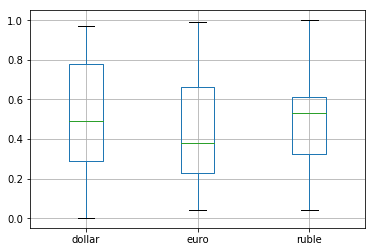

In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

shape1 = (31, 3)

fileName = 'df_{}x{}.xlsx'.format(*shape1)
filePath = './dataset/dat6'
iPath = '{}/{}'.format(filePath, fileName)

arr = np.random.random(shape1)

box = ['dollar', 'euro', 'ruble']

times = pd.date_range('2017-01-01', '2017-01-31', step='1d' )
print times

df = pd.DataFrame(arr, columns=box, index=times)

df.to_excel(iPath, sheet_name='Money', float_format='%.2f',
            header=True, index=True)

ax = df.boxplot()
plt.show()